In [20]:
import statsmodels.api as sm

# 기저함수

다음과 같은 비선형 데이터가 존재할 때 이를 선형회귀 모형으로 분석하는 것은 적합하지 않다.

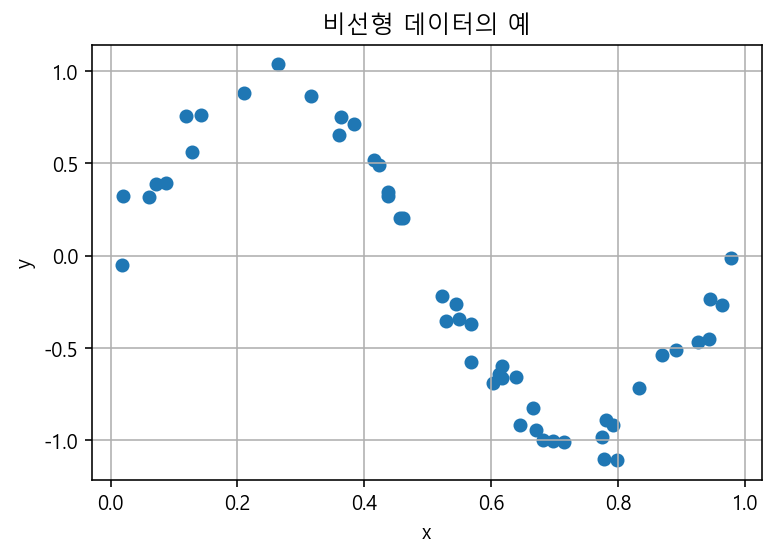

In [21]:
def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 50
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)

X, y = make_nonlinear()
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("비선형 데이터의 예")
plt.grid()
plt.show()

따라서 이 경우 비선형 데이터에 맞는 비선형 모형을 만들기 위해 $y = w\phi(x)$라는 비선형 함수를 이용해 $\phi$에 대해선 선형회귀분석이 되는 모형을 만들어줘야한다. 

즉, $\phi$가 무엇인지는 사람이 생각해내야한다.

하지만 현실의 여러 데이터에 대해 적합한 비선형 함수를 계속해서 생각해낸다는 이 과정은 상당히 어려운 작업이다. 

따라서 기저함수라는 것을 이용할 수 있는데 기저함수란 사람이 직접 비선형 함수를 생각해내는 것이 아니라 특정한 규칙에 따라 이미 만들어진 함수의 수열이다. 즉, 기저함수를 이용하는 것으로 어떤 모양의 함수라도 비슷하게 모델링 하는 것이 가능해진다.

기저함수에는 다항 기저함수, 직교 기저함수, 방사 기저함수, 삼각 기저함수, 시그모이드 기저함수 등등 수많은 기저함수가 있지만 일반적으로 가장 많이 사용하는 함수는 다항 기저함수이다.

다항 기저함수의 예

$$y = w_0 + w_1x + w_2x^2 + ... w_Mx^M$$

이처럼 다항 기저함수를 이용한 회귀분석을 다항 회귀분석이라 한다.(Polynomial Regression)

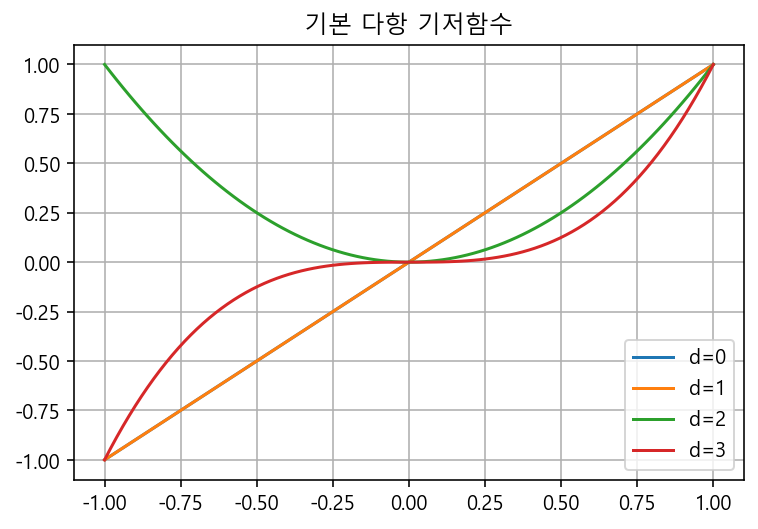

In [22]:
phi_0 = np.polynomial.Polynomial.basis(1)
phi_1 = np.polynomial.Polynomial.basis(1)
phi_2 = np.polynomial.Polynomial.basis(2)
phi_3 = np.polynomial.Polynomial.basis(3)

x = np.linspace(-1, 1, 100)

plt.plot(x, phi_0(x), label="d=0")
plt.plot(x, phi_1(x), label="d=1")
plt.plot(x, phi_2(x), label="d=2")
plt.plot(x, phi_3(x), label="d=3")
plt.legend()
plt.title("기본 다항 기저함수")
plt.grid()
plt.show()

# 다항회귀분석

위에서 생성한 비선형 데이터를 일반적인 선형회귀분석을 이용해 모델링 한 경우 퍼포먼스(R-squared)는 0.53으로 측정된다.

In [23]:
dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

print(sm.OLS.from_formula("y ~ x", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     54.13
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           2.09e-09
Time:                        12:44:06   Log-Likelihood:                -29.625
No. Observations:                  50   AIC:                             63.25
Df Residuals:                      48   BIC:                             67.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7414      0.140      5.300      0.0

2차항을 추가하여 모델링 한 결과는 아래와 같다.

퍼포먼스는 0.53에서 0.537로 성능이 약간 상승하였다.

In [24]:
print(sm.OLS.from_formula('y ~ x + I(x**2)', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     27.26
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           1.38e-08
Time:                        12:44:06   Log-Likelihood:                -29.247
No. Observations:                  50   AIC:                             64.49
Df Residuals:                      47   BIC:                             70.23
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8598      0.198      4.339      0.0

마지막으로 3차항까지 추가하여 모델링한 결과는 다음과 같다.

퍼포먼스는 0.537에서 0.967로 급격하게 성능이 상승한 것을 확인할 수 있다.

In [25]:
print(sm.OLS.from_formula('y ~ x + I(x**2) + I(x**3)', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     442.5
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           6.40e-34
Time:                        12:44:06   Log-Likelihood:                 36.411
No. Observations:                  50   AIC:                            -64.82
Df Residuals:                      46   BIC:                            -57.17
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2430      0.070     -3.448      0.0

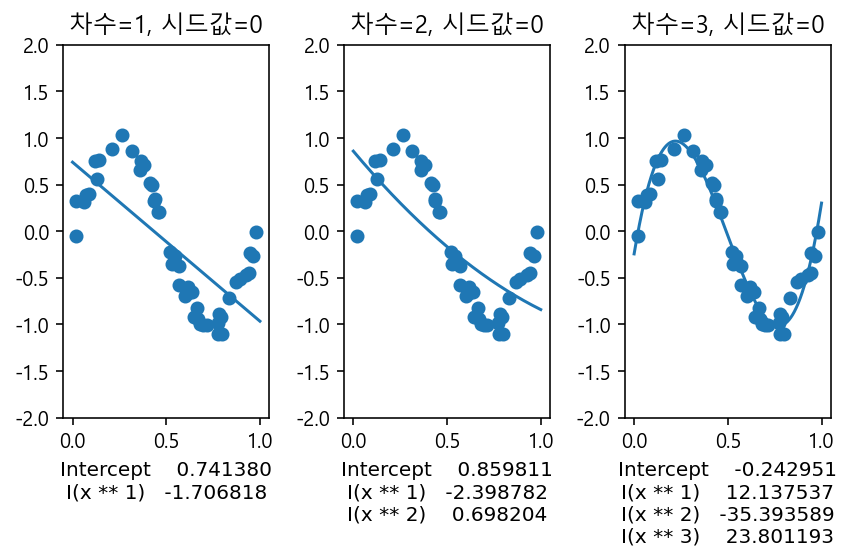

In [26]:
def polyreg(degree, seed=0, ax=None):
    X, y = make_nonlinear(seed)

    dfX = pd.DataFrame(X, columns=["x"])
    dfX = sm.add_constant(dfX)
    dfy = pd.DataFrame(y, columns=["y"])
    df = pd.concat([dfX, dfy], axis=1)

    model_str = "y ~ "
    for i in range(degree):
        if i == 0:
            prefix = ""
        else:
            prefix = " + "
        model_str += prefix + "I(x**{})".format(i + 1)
    model = sm.OLS.from_formula(model_str, data=df)
    result = model.fit()

    if ax:
        ax.scatter(X, y)
        xx = np.linspace(0, 1, 1000)
        dfX_new = pd.DataFrame(xx[:, np.newaxis], columns=["x"])
        ax.plot(xx, result.predict(dfX_new))
        ax.set_ylim(-2, 2)
        ax.set_title("차수={}, 시드값={}".format(degree, seed))
        xlabel = "\n".join(str(result.params).split("\n")[:-1])
        font = {'family': 'NanumGothicCoding', 'color':  'black', 'size': 10}
        ax.set_xlabel(xlabel, fontdict=font)

    return result

ax1 = plt.subplot(131)
polyreg(1, ax=ax1)
ax2 = plt.subplot(132)
polyreg(2, ax=ax2)
ax3 = plt.subplot(133)
polyreg(3, ax=ax3)
plt.tight_layout()

plt.show()

회귀분석 결과를 시각화해보면 2차항, 3차항을 추가할 때마다 모델링한 회귀선이 점점 더 data에 fit한 모습을 보이는 것을 확인할 수 있다. 

# 과적합

과적합(overfitting)이란 특정 샘플 데이터에 대해 모델이 과도하게 최적화 된 것을 의미한다.

과적합은 아래의 경우 발생한다.

- 독립변수 데이터의 갯수에 비해 모형 모수의 수가 과도하게 큰 경우

- 독립변수 데이터가 서로 독립이 아닌 경우(다중공선성)

이러한 상황에서는 같은 조건에 대한 복수의 답이 존재할 수 있기 때문이다.

과적합이 불러오는 문제는 다음과 같다.

- 학습에 사용되지 않은 새로운 데이터가 주어졌을 때 그 오차가 커지게 된다.

- 샘플이 조금만 변화해도 가중치 계수의 값이 크게 달라지며 추정이 부정확해진다.

아래는 차수를 15, 30, 45로 지정하여 총 세개의 다항회귀 모델을 시각화 한 결과이다.

차수가 증가할수록 학습데이터에는 점점 더 fit해지며 모델링한 회귀선이 모든 데이터를 통과하는 모습을 확인할 수 있다. 하지만 학습되지 않은 새로운 데이터가 들어왔을 때는 그 오차가 커지는 것을 확인할 수 있다. 

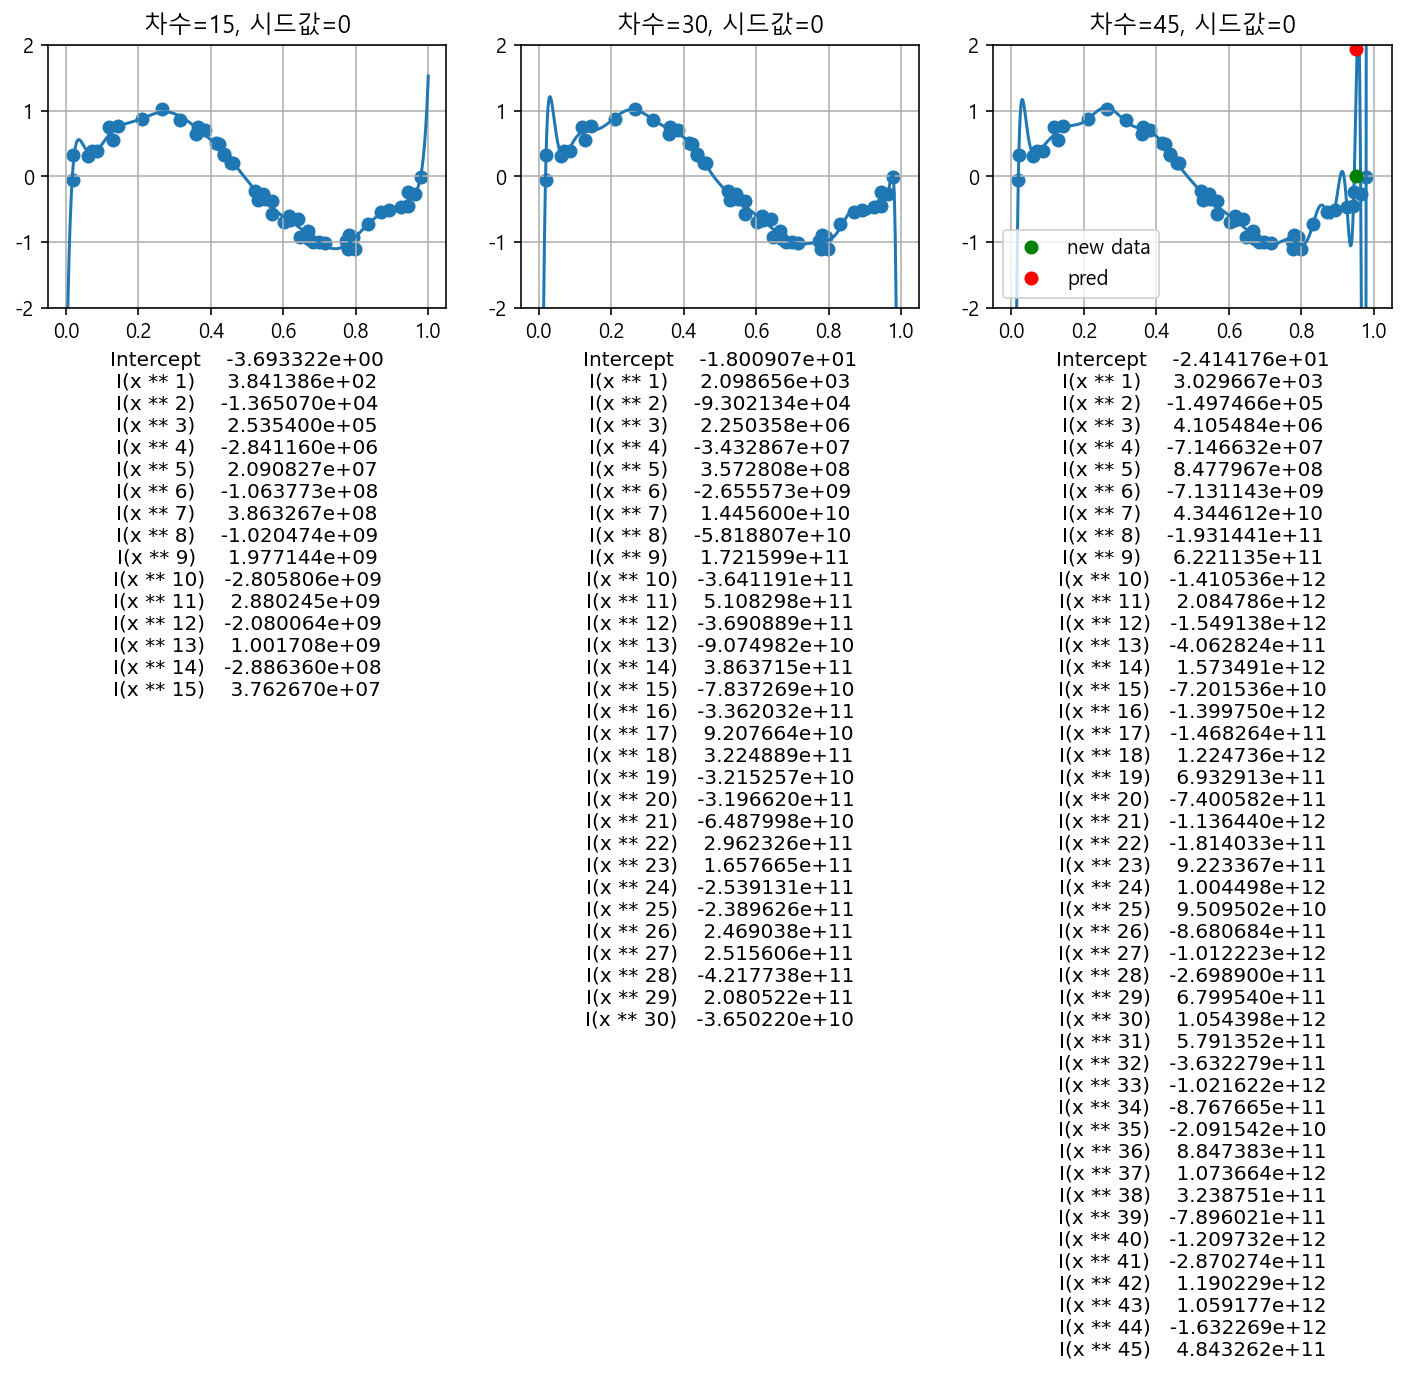

In [66]:
axes = [ax1, ax2, ax3]
plt.figure(figsize=(10,10))
for i in range(3):
    axes[i] = plt.subplot(1,3,i+1)
    polyreg((i+1)*15, ax=axes[i])
    plt.grid()
plt.plot(0.95, 0, 'go', label='new data')
plt.plot(0.95, 1.95, 'ro', label='pred')
plt.legend()
plt.tight_layout()
plt.show()

또한 같은 차수를 이용한 다항회귀 모델에서 시드값을 약간씩 변경하여 데이터를 아주 조금씩 변경한 결과 가중치 값이 크게 달라지는 것을 확인할 수 있다.

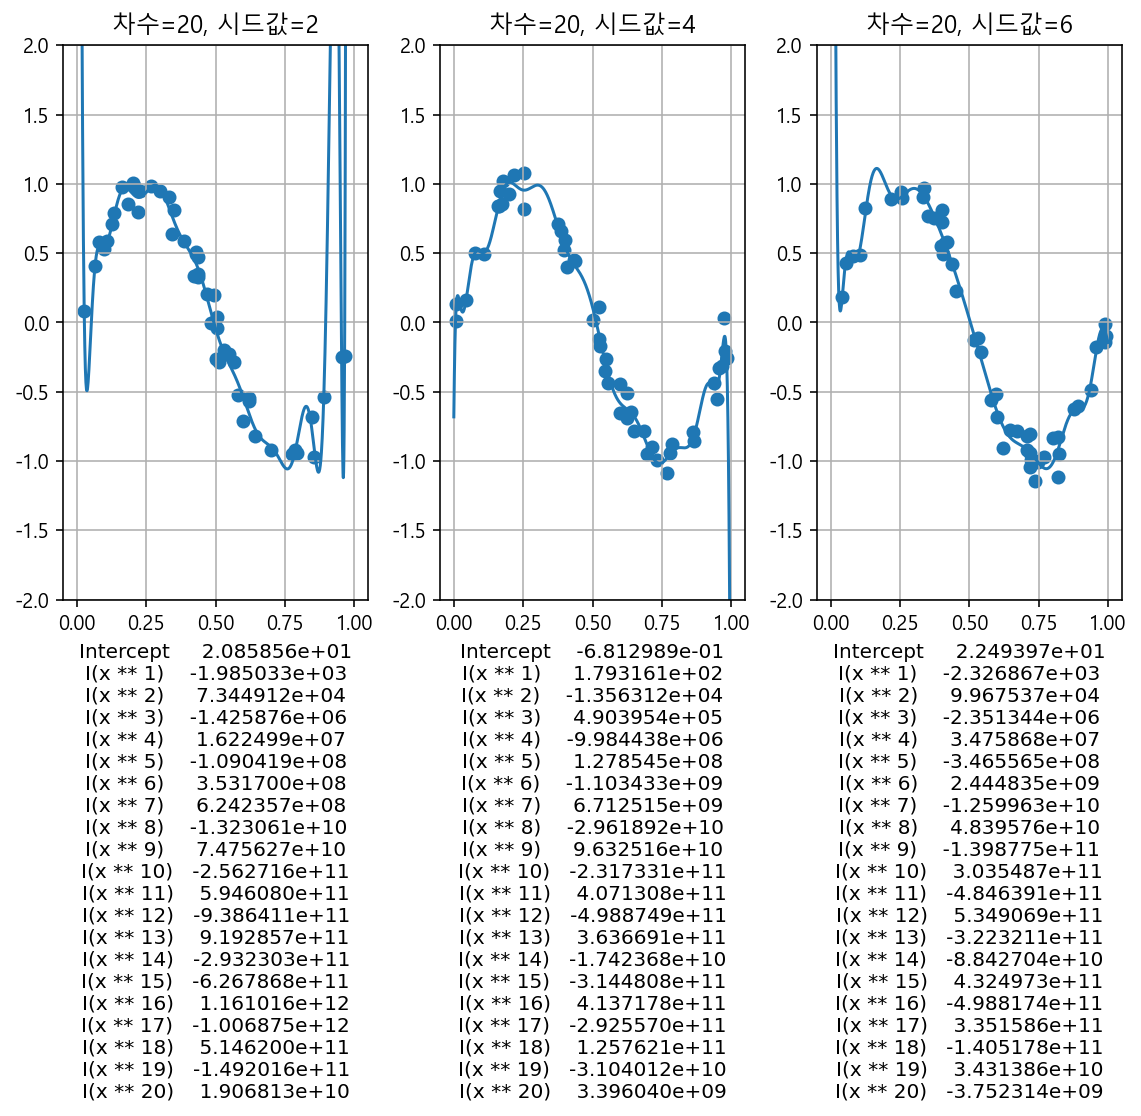

In [69]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(131)
polyreg(20, seed=2, ax=ax1)
plt.grid()
ax2 = plt.subplot(132)
polyreg(20, seed=4, ax=ax2)
plt.grid()
ax3 = plt.subplot(133)
polyreg(20, seed=6, ax=ax3)
plt.grid()
plt.tight_layout()
plt.show()

분명 같은 차수를 이용한 다항회귀임에도 불구하고 20차식의 계수는 각각 190억, 33억, -37억으로 매우 큰 차이를 보인다.